In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [146]:
df = pd.read_csv('DadosPartidas.csv', sep = ',')
#print(df)
#df.describe()
#df.info()

In [239]:
df1 = df.drop(columns=['team', 'match', 'date', 'points'])
X = df1.drop(columns='won')

y = df1.won
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [240]:
clf = tree.DecisionTreeClassifier(max_depth=4) #, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

In [241]:
#tree.plot_tree(clf)


In [242]:
y_pred = clf.predict(X_test)


In [243]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      #class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("arvore")
#graph

'arvore.pdf'

In [244]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7314814814814815


best max_depth : 10, acc: 77.22%


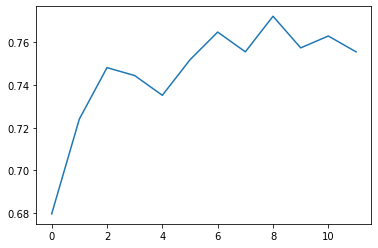

In [411]:
N=14
acc = np.zeros(N)
clf = np.zeros(N).astype('object')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for i in range(2, N):
    clf[i] = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy', min_samples_split=8, min_samples_leaf=1)
    clf[i] = clf[i].fit(X_train, y_train)
    y_pred = clf[i].predict(X_test)
    acc[i] = metrics.accuracy_score(y_test, y_pred)



    
best_index = np.argmax(acc)
dot_data = tree.export_graphviz(clf[best_index], out_file=None, 
                      feature_names=X.columns,  
                      #class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render("arvore")

print("best max_depth : {}, acc: {:.2f}%".format(best_index, 100*acc[best_index]))
plt.plot(acc[2:])
plt.show()

In [257]:
acc

array([0.        , 0.        , 0.67962963, 0.72407407, 0.74814815,
       0.74444444, 0.73148148, 0.7537037 , 0.76666667, 0.74259259,
       0.77777778, 0.74074074, 0.76111111, 0.74259259])